# Pupil Apodization -- Gaussian Mask 

- 円形開口の平面波を作り (pupa)-> コロナグラフ関数としてno coronagraphとpupil apodization (Gausian Mask) を適用 -> 焦点面を算出(foca)するコード。

In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
import pylab
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [7]:
#from vcr/src
import plain_wave as pw
import mask_circular as mc
import mask_gaussian as mg
import no_coronagraph as nc

## 円形開口マスク
望遠鏡のマスクはpupil to pupil maskの関数である

In [8]:
n=128 # sampling rate at a pupil
pos_star=[0.0,0.0] #angle in unit of lambda/D
pupa = pw.wg_plain_wave(n,pos_star)
mask=mc.p2pm_circular(pupa)
pupa[mask]=0.0+0.0j

In [9]:
exprat=16 #oversampling factor at a focal plane
foca = nc.cf_no_coronagraph(pupa,exprat=exprat)

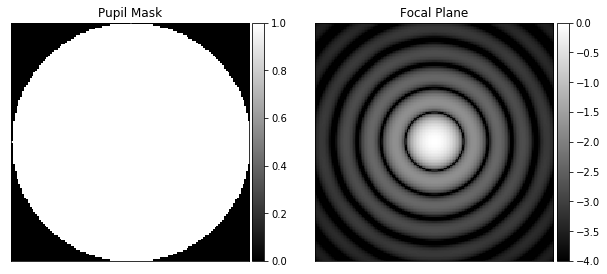

In [10]:
#表示
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(121)
q=ax.imshow(np.abs(pupa),cmap="gray")
plt.title("Pupil Mask")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(q, cax=cax)
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])
ax=fig.add_subplot(122)
maxv=np.max(np.abs(foca)**2)
a=ax.imshow(np.log10(np.abs(foca)**2/maxv),cmap="gray",vmin=-4,vmax=0)
nx=foca.shape[0]
ny=foca.shape[1]
plt.xlim(nx/2-5*exprat,nx/2+5*exprat)
plt.ylim(ny/2-5*exprat,ny/2+5*exprat)
plt.title("Focal Plane")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(a, cax=cax)
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])
plt.savefig("pupil_airy.pdf", bbox_inches="tight", pad_inches=0.0)
plt.show()

Airy diskが現われる

## Gaussian マスク

In [11]:
n=128 # sampling rate at a pupil
pos_star=[0.0,0.0] #angle in unit of lambda/D
pupa = pw.wg_plain_wave(n,pos_star)
sigma=(n/5.0)
pupa=mg.p2p_gaussian(pupa,sigma=sigma)
exprat=16 #oversampling factor at a focal plane
foca = nc.cf_no_coronagraph(pupa,exprat=exprat)

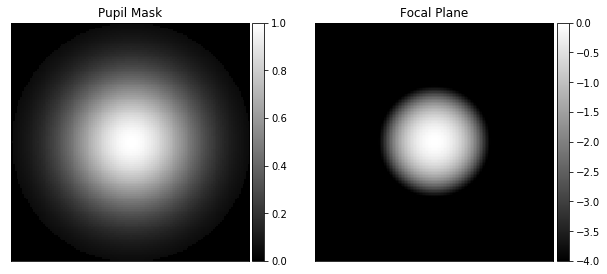

In [12]:
#表示
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(121)
q=ax.imshow(np.abs(pupa),cmap="gray")
plt.title("Pupil Mask")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(q, cax=cax)
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])
ax=fig.add_subplot(122)
maxv=np.max(np.abs(foca)**2)
a=ax.imshow(np.log10(np.abs(foca)**2/maxv),cmap="gray",vmin=-4,vmax=0)
nx=foca.shape[0]
ny=foca.shape[1]
plt.xlim(nx/2-5*exprat,nx/2+5*exprat)
plt.ylim(ny/2-5*exprat,ny/2+5*exprat)
plt.title("Focal Plane")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(a, cax=cax)
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])
plt.savefig("pupil_gaus.pdf", bbox_inches="tight", pad_inches=0.0)
plt.show()